In [1]:
from cvfwVer2 import CVFW_MODEL, CVFW_UPDATE

In [2]:
mask_model = CVFW_MODEL(dsize=(100, 100))

mask_model.add_directory(class_name="with mask", path = "C:\\kimdonghwan\\python\\CVFW\\image\\train\\mask\\with")
mask_model.add_directory(class_name="without mask", path = "C:\\kimdonghwan\\python\\CVFW\\image\\train\\mask\\without")

In [3]:
mask_model.train()

without mask: 100%|█████████████████████████████████████████████████████████████| 10000/10000 [01:36<00:00, 104.13it/s]


In [5]:
import matplotlib.pyplot as plt

(feature_count) / (sum count) : 0.3686797133893554


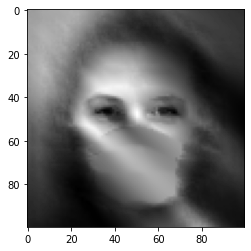

In [6]:
with_mask_img = mask_model.modeling(class_name="with mask")
plt.imshow(with_mask_img, cmap='gray')

(feature_count) / (sum count) : 0.31604165048277755


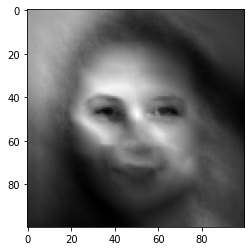

In [6]:
without_mask_img = mask_model.modeling(class_name="without mask")
plt.imshow(without_mask_img, cmap='gray')

In [19]:
mask_update = CVFW_UPDATE(mask_model, feature_group_number = [3], feature_weight_number = [50])

mask_update.add_validation(class_name="with mask", path="C:\\kimdonghwan\\python\\CVFW\\image\\test\\mask\\with")
mask_update.add_validation(class_name="without mask", path="C:\\kimdonghwan\\python\\CVFW\\image\\test\\mask\\without")

In [10]:
mask_update.update()

feature_group_number: 3, feature_weight_nummber: 50 Done!, accuracy: 0.754


In [11]:
mask_update.set(feature_group_number = [500], feature_weight_number = [400])
mask_update.update()

feature_group_number: 500, feature_weight_nummber: 400 Done!, accuracy: 0.866


In [12]:
mask_update.set(feature_group_number = [1], feature_weight_number = [450])
mask_update.update()

feature_group_number: 1, feature_weight_nummber: 450 Done!, accuracy: 0.831


In [14]:
mask_update.set(feature_group_number = [1], feature_weight_number = [350])
mask_update.update()

feature_group_number: 1, feature_weight_nummber: 350 Done!, accuracy: 0.798


In [17]:
mask_update.set(feature_group_number = [200, 300, 400], feature_weight_number = [400])
mask_update.update()

feature_group_number: 200, feature_weight_nummber: 400 Done!, accuracy: 0.866
feature_group_number: 300, feature_weight_nummber: 400 Done!, accuracy: 0.866
feature_group_number: 400, feature_weight_nummber: 400 Done!, accuracy: 0.866


In [20]:
mask_update.set(feature_group_number = [50], feature_weight_number = [0])
mask_update.update()

feature_group_number: 50, feature_weight_nummber: 0 Done!, accuracy: 0.79


In [22]:
mask_update.set(feature_group_number = [500], feature_weight_number = [85])
mask_update.update()

feature_group_number: 500, feature_weight_nummber: 85 Done!, accuracy: 0.853


In [32]:
mask_update.set(feature_group_number = [20], feature_weight_number = [110, 120, 130])
mask_update.update()

feature_group_number: 20, feature_weight_nummber: 110 Done!, accuracy: 0.8733333333333333
feature_group_number: 20, feature_weight_nummber: 120 Done!, accuracy: 0.8833333333333333
feature_group_number: 20, feature_weight_nummber: 130 Done!, accuracy: 0.8933333333333333


In [40]:
mask_update.set(feature_group_number = [5], feature_weight_number = [130, 133, 134])
mask_update.update()

feature_group_number: 5, feature_weight_nummber: 130 Done!, accuracy: 0.8933333333333333
feature_group_number: 5, feature_weight_nummber: 133 Done!, accuracy: 0.89
feature_group_number: 5, feature_weight_nummber: 134 Done!, accuracy: 0.8866666666666667


### 결론
- feature_group_number: 5
- feature_weight_number: 130
- accuracy: 89.33333333333333%

In [2]:
mask_model = CVFW_MODEL(dsize = (100, 100), feature_group_number = 5, feature_weight_number = 130)

mask_model.add_directory(class_name="with mask", path = "C:\\kimdonghwan\\python\\CVFW\\image\\train\\mask\\with")
mask_model.add_directory(class_name="without mask", path = "C:\\kimdonghwan\\python\\CVFW\\image\\train\\mask\\without")

mask_model.train()

without mask: 100%|██████████████████████████████████████████████████████████████| 10000/10000 [01:42<00:00, 97.59it/s]


[0.4904601924768896, 0.5095398075231105]


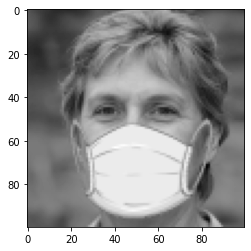

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

with_img = cv2.cvtColor(cv2.imread("C:\\kimdonghwan\\python\\CVFW\\image\\test\\mask\\with\\with (4511).png"), cv2.COLOR_BGR2GRAY)
plt.imshow(with_img, cmap="gray")

predict = mask_model.predict_class(with_img.flatten().tolist())
print(predict)

[0.5037449364637243, 0.4962550635362757]


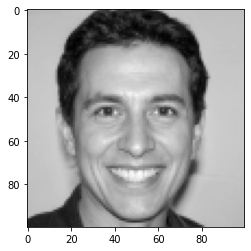

In [4]:
without_img = cv2.cvtColor(cv2.imread("C:\\kimdonghwan\\python\\CVFW\\image\\test\\mask\\without\\without (4505).png"), cv2.COLOR_BGR2GRAY)
plt.imshow(without_img, cmap="gray")

predict = mask_model.predict_class(without_img.flatten().tolist())
print(predict)

0.8933333333333333


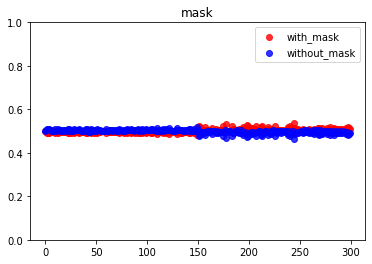

In [5]:
from os import listdir

count = 0
answer = 0

predicts = []

with_mask_files = listdir("C:\\kimdonghwan\\python\\CVFW\\image\\test\\mask\\with")[:250]
without_mask_files = listdir("C:\\kimdonghwan\\python\\CVFW\\image\\test\\mask\\without")[:250]

for file in with_mask_files:
    img = cv2.cvtColor(cv2.imread(f"C:\\kimdonghwan\\python\\CVFW\\image\\test\\mask\\with\\{file}", 1), cv2.COLOR_BGR2GRAY).flatten().tolist()
    predict = mask_model.predict_class(img)
    predicts.append(predict)
    
    if min(predict) == predict[0]: answer += 1
    count += 1
    
for file in without_mask_files:
    img = cv2.cvtColor(cv2.imread(f"C:\\kimdonghwan\\python\\CVFW\\image\\test\\mask\\without\\{file}", 1), cv2.COLOR_BGR2GRAY).flatten().tolist()
    predict = mask_model.predict_class(img)
    predicts.append(predict)
    
    if min(predict) == predict[1]: answer += 1
    count += 1
    
print(answer / count)


x = [i for i in range(len(predicts))]
with_mask_y = [i[0] for i in predicts]
without_mask_y = [i[1] for i in predicts]

plt.scatter(x, with_mask_y, color="red", label="with_mask", alpha=0.8)
plt.scatter(x, without_mask_y, color="blue", label="without_mask", alpha=0.8)
plt.ylim(0, 1.0)
plt.title("mask")
plt.legend()